In [7]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#read the dataset  
companies = pd.read_csv('./companies.csv', encoding="ISO-8859-1")
rounds2 = pd.read_csv('./rounds2.csv', encoding="ISO-8859-1")

In [9]:
#Check the datatypes of all the columns of the dataframe
rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [10]:
#Check the datatypes of all the columns of the dataframe
companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [11]:
#Check the shape of the dataframe
rounds2.shape

(114949, 6)

In [12]:
rounds2.groupby('company_permalink')['company_permalink'].count()
# (rounds2['company_permalink'].value_counts() == 1).sum()

company_permalink
/ORGANIZATION/-QOUNTER                                         1
/ORGANIZATION/-THE-ONE-OF-THEM-INC-                            1
/ORGANIZATION/004-TECHNOLOGIES                                 1
/ORGANIZATION/0NDINE-BIOMEDICAL-INC                            1
/ORGANIZATION/0XDATA                                           2
                                                              ..
/organization/zystor                                           1
/organization/zzish                                            2
/organization/zzzzapp-com                                      2
/organization/ãeron                                           1
/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic    1
Name: company_permalink, Length: 90247, dtype: int64

In [13]:
#Check the number of unique rows for company_permalink in rounds2
len(pd.unique(rounds2['company_permalink']))

90247

In [14]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [15]:
#Shape of companies data frame
companies.shape

(66368, 10)

In [16]:
len(pd.unique(companies['name']))

66100

In [17]:
#Check the number of unique rows for company_permalink in companies
len(pd.unique(companies['permalink']))

66368

In [18]:
#We find that permalink is the primary key
(companies.groupby('name').permalink.count())

name
#BratPackStyle, LLC.         1
#HASHOFF                     1
#NAME?                       4
#fame                        1
#waywire                     1
                            ..
Ä°Å kutusu video ajansÄ±    1
Ðnso.fm                     1
âShwrÃ¼m                   1
âWestEd                    1
åç¥é©¬ ChiShenMa          1
Name: permalink, Length: 66099, dtype: int64

In [19]:
#Check the number of unique rows for company_permalink in companies
companies['company_permalink'] = companies['permalink']
# companies = companies.drop(columns='permalink')
len(pd.unique(companies['company_permalink']))

66368

In [20]:
#Check the percentage of null values in companies
companies.isnull().sum()/(companies.count() + companies.isnull().sum())

permalink            0.000000
name                 0.000015
homepage_url         0.076211
category_list        0.047432
status               0.000000
country_code         0.104840
state_code           0.128782
region               0.120992
city                 0.120962
founded_at           0.229342
company_permalink    0.000000
dtype: float64

In [21]:
#These nulls will not affect our analysis
companies[companies.country_code.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/Organization/-The-One-Of-Them-Inc-
21,/Organization/1000Chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008,/Organization/1000Chi
35,/Organization/10K-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015,/Organization/10K-2
39,/Organization/10Tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,operating,NaN,NaN,NaN,NaN,01-01-2012,/Organization/10Tracks-2
45,/Organization/115-Network-Disks,115 network disks,http://www.115.com/,EdTech|Education,operating,NaN,NaN,NaN,NaN,NaN,/Organization/115-Network-Disks
...,...,...,...,...,...,...,...,...,...,...,...
66317,/Organization/Zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,closed,NaN,NaN,NaN,NaN,16-09-2014,/Organization/Zuumtel
66325,"/Organization/Zwayo-""On-Demand-Valet-Parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,operating,NaN,NaN,NaN,NaN,01-09-2014,"/Organization/Zwayo-""On-Demand-Valet-Parking"""
66333,/Organization/Zyfin,Zyfin,http://www.zyfin.com/,Finance,operating,NaN,NaN,NaN,NaN,NaN,/Organization/Zyfin
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/Organization/ÃEron


In [22]:
#find company with name as null
companies[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink
56916,/Organization/Tell-It-In,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011,/Organization/Tell-It-In


In [23]:
#Check the percentage of null values in rounds2
rounds2.isnull().sum()/(rounds2.count() + rounds2.isnull().sum())

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funding_round_code         0.729097
funded_at                  0.000000
raised_amount_usd          0.173903
dtype: float64

In [24]:
#Replace raised amount with median values for each type
rounds2.loc[(rounds2['raised_amount_usd'].isnull()) & (rounds2['funding_round_type'] == 'venture'), 'raised_amount_usd'] = 5000000 
rounds2.loc[(rounds2['raised_amount_usd'].isnull()) & (rounds2['funding_round_type'] == 'seed'), 'raised_amount_usd'] = 275000
rounds2.loc[(rounds2['raised_amount_usd'].isnull()) & (rounds2['funding_round_type'] == 'private_equity'), 'raised_amount_usd'] = 20000000
rounds2.loc[(rounds2['raised_amount_usd'].isnull()) & (rounds2['funding_round_type'] == 'angel'), 'raised_amount_usd'] = 400000

In [25]:
#replace company with name null from permalink
companies.loc[companies.permalink == '/organization/tell-it-in', 'name'] = companies[companies.permalink == '/organization/tell-it-in']['permalink'].apply(lambda x: x.split('/')[-1])

In [26]:
companies['company_permalink'] = companies.company_permalink.str.lower()
rounds2['company_permalink'] = rounds2.company_permalink.str.lower()
rounds2 = rounds2.reset_index(drop=True)
companies = companies.reset_index(drop=True)

In [27]:
# master_frame = pd.concat([rounds2, companies], join="inner", axis=1)
master_frame = rounds2.merge(companies, on="company_permalink", how="inner")

In [28]:
master_frame.shape

(114942, 16)

In [29]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        108722 non-null  float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [30]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [31]:
len(pd.unique(master_frame['company_permalink']))

66363

In [32]:
len(pd.unique(master_frame['name']))

66095

In [33]:
master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,400000.0
convertible_note,272000.0
debt_financing,1100000.0
equity_crowdfunding,100000.0
grant,201684.0
non_equity_assistance,60000.0
post_ipo_debt,19950000.0
post_ipo_equity,12262852.5
private_equity,20000000.0


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

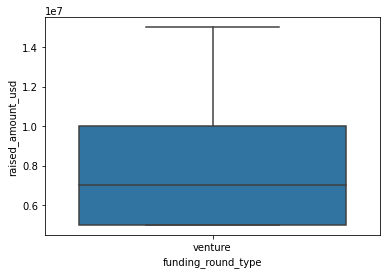

In [34]:
sns.boxplot(x=master_frame[master_frame['funding_round_type']=='venture']['funding_round_type'], y=master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]['raised_amount_usd'])

In [35]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [36]:
# rounds2.count()
# companies.count()
rounds2['company_permalink'] = rounds2.company_permalink.str.lower()
companies['permalink'] = companies.permalink.str.lower()
df2 = rounds2.merge(companies, left_on="company_permalink", right_on="permalink", how="inner")
# df2.info()

In [37]:
len(companies.permalink.values)
# in rounds2.company_permalink.values
len(rounds2.company_permalink.values)

114949

In [38]:
len(pd.unique(rounds2['company_permalink']))
len(pd.unique(companies['permalink']))

66368

In [39]:
# np.setdiff1d(pd.unique(rounds2['company_permalink']), pd.unique(companies['permalink']))

In [40]:
companies.isnull().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
founded_at           15221
company_permalink        0
dtype: int64

In [41]:
rounds2.isnull().sum()
# rounds2.shape
rounds2.count()

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd          108729
dtype: int64

In [42]:
rounds2.raised_amount_usd.describe()

count    1.087290e+05
mean     9.434759e+06
std      1.073437e+08
min      0.000000e+00
25%      2.750000e+05
50%      1.500001e+06
75%      5.897313e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [43]:
med_funding = rounds2[(rounds2['funding_round_type'] == 'venture') | (rounds2['funding_round_type'] == 'angel') | (rounds2['funding_round_type'] == 'seed') | (rounds2['funding_round_type'] == 'private_equity')].groupby('funding_round_type').median()
med_funding
# med_funding[(med_funding.raised_amount_usd >= 5000000) & (med_funding.raised_amount_usd <= 15000000)]

,raised_amount_usd
funding_round_type,
angel,400000.0
private_equity,20000000.0
seed,275000.0
venture,5000000.0


In [44]:
rounds2.isnull().sum()/(rounds2.count() + rounds2.isnull().sum())

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funding_round_code         0.729097
funded_at                  0.000000
raised_amount_usd          0.054111
dtype: float64

In [45]:
# master_frame_country shows total raised amount for each country against the funding type 
# top9 shows the top 9 countries where there is maximum venture funding

# master_frame = master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
# master_frame_country = pd.pivot_table(master_frame, index='country_code', values='raised_amount_usd', columns='funding_round_type', aggfunc=sum)
# master_frame_country = pd.pivot_table(master_frame, index='country_code', values='raised_amount_usd', columns='funding_round_type', aggfunc=sum)
master_frame_country = pd.pivot_table(master_frame, index='country_code', values='raised_amount_usd', columns='funding_round_type', aggfunc=sum)
# master_frame_country = pd.pivot_table(master_frame, index='country_code', values='raised_amount_usd', columns='funding_round_type', aggfunc=lambda x: np.median(x))
# master_frame_country[(master_frame_country['venture'] >= 5000000) & (master_frame_country['venture'] <= 15000000)].loc[:, 'venture']
top9 = master_frame_country.sort_values(by='venture', ascending=False).loc[:, 'venture'].head(9)
top9

country_code
USA    4.336758e+11
CHN    4.245042e+10
GBR    2.148563e+10
IND    1.523186e+10
CAN    1.003333e+10
FRA    7.599537e+09
DEU    7.486960e+09
ISR    7.477515e+09
JPN    3.583677e+09
Name: venture, dtype: float64

In [46]:
mapping = pd.read_csv('./mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
## wide_format to long_format for mapping dataframe
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns, value_vars))
long_mapping = pd.melt(mapping, id_vars=id_vars, value_vars=value_vars)
long_mapping = long_mapping[long_mapping.value ==1]
long_mapping = long_mapping.drop('value', axis=1)
long_mapping = long_mapping.reset_index(drop=True)
long_mapping = long_mapping.rename(columns={'variable': 'main_sectors'})
long_mapping.head()

,category_list,main_sectors
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [48]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [49]:
#Adding an updated primary sector by selecting the first sub string split based on '|'
master_frame['category_list_upd'] = master_frame[master_frame['category_list'].apply(lambda x: isinstance(x, str))]['category_list'].apply(lambda x: x.split('|')[0])
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,category_list_upd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,5000000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


In [50]:
#merged_frame contains columns in the master_frame mapped to the main sectors in long_mapping data frame.
merged_frame = master_frame.merge(long_mapping, left_on="category_list_upd", right_on="category_list", how="inner")
merged_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,category_list_upd,category_list_y,main_sectors
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment
4,/organization/a-b-productions,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,NaN,/Organization/A-B-Productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,Media,Media,Entertainment


In [51]:
# Three data frames for top 3 english speaking countries for venture funding in the range 5-15 million usd 
D1 = merged_frame[(merged_frame['country_code'] == 'USA') & (merged_frame['funding_round_type'] == 'venture') & (merged_frame['raised_amount_usd'] >= 5000000) & (merged_frame['raised_amount_usd'] <= 15000000)]
D2 = merged_frame[(merged_frame['country_code'] == 'GBR') & (merged_frame['funding_round_type'] == 'venture') & (merged_frame['raised_amount_usd'] >= 5000000) & (merged_frame['raised_amount_usd'] <= 15000000)]
D3 = merged_frame[(merged_frame['country_code'] == 'CAN') & (merged_frame['funding_round_type'] == 'venture') & (merged_frame['raised_amount_usd'] >= 5000000) & (merged_frame['raised_amount_usd'] <= 15000000)]

In [52]:
master_frame_country.sort_values(by='venture', ascending=False)

funding_round_type,angel,convertible_note,debt_financing,equity_crowdfunding,grant,non_equity_assistance,post_ipo_debt,post_ipo_equity,private_equity,product_crowdfunding,secondary_market,seed,undisclosed,venture
country_code,,,,,,,,,,,,,,
USA,2.211993e+09,1.536450e+09,9.341181e+10,381330439.0,6.862227e+09,24890302.0,1.734493e+10,2.683811e+10,7.912128e+10,345406095.0,2.036869e+09,1.145633e+10,9.431565e+09,4.336758e+11
CHN,5.192570e+08,5.000000e+05,4.639087e+09,0.0,3.275000e+05,NaN,2.390000e+08,3.171800e+09,2.119665e+10,1832917.0,1.000000e+08,6.096658e+07,6.053602e+09,4.245042e+10
GBR,3.255636e+08,2.294095e+07,1.111956e+09,142323529.0,8.194372e+08,1776025.0,1.200000e+08,1.413931e+09,6.096833e+09,80161880.0,0.000000e+00,1.180605e+09,1.886966e+09,2.148563e+10
IND,1.166427e+08,5.328100e+07,4.275678e+09,109000.0,2.599839e+07,6250.0,NaN,1.250000e+08,6.667512e+09,80811.0,2.100000e+05,3.746053e+08,1.874354e+09,1.523186e+10
CAN,1.539796e+08,2.890634e+07,7.502228e+08,12100443.0,7.663072e+07,775573.0,9.092983e+08,2.996888e+09,3.133348e+09,5464588.0,NaN,5.879247e+08,3.732780e+08,1.003333e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGO,NaN,NaN,2.850000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UZB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN
VEN,4.000000e+05,9.445220e+05,NaN,NaN,4.449820e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.527930e+06,NaN,NaN


In [53]:
#Analysing the top sectors by amount invested for venture investment in these countries
df_type_sectors = pd.pivot_table(merged_frame, index='country_code', values='raised_amount_usd', columns=['funding_round_type', 'main_sectors'], aggfunc=lambda x: np.median(x))
df_type_sectors['country_code'] = df_type_sectors.index
# df_type_sectors[df_type_sectors.country_code == 'KNA']['venture']
# df_type_sectors[df_type_sectors.country_code == 'KWT']['venture']
# df_type_sectors[df_type_sectors.country_code == 'BAH']['venture']
df_type_sectors[df_type_sectors.country_code == 'USA']['venture']
df_type_sectors[df_type_sectors.country_code == 'GBR']['venture']
df_type_sectors[df_type_sectors.country_code == 'CAN']['venture']

main_sectors,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,,
CAN,2500000.0,5000000.0,5000000.0,5000000.0,2580000.0,3800000.0,5000000.0,4000000.0,4499999.0


In [54]:
#Analysing the total number of investments in these countries by funding type
# merged_frame.groupby('country_code')['funding_round_type'].value_counts().at['KNA']
# merged_frame.groupby('country_code')['funding_round_type'].value_counts().at['KWT']
# merged_frame.groupby('country_code')['funding_round_type'].value_counts().at['BAH']
merged_frame.groupby('country_code')['funding_round_type'].value_counts().at['USA']
merged_frame.groupby('country_code')['funding_round_type'].value_counts().at['GBR']
merged_frame.groupby('country_code')['funding_round_type'].value_counts().at['CAN']

funding_round_type
venture                  1271
seed                      806
equity_crowdfunding       160
angel                     150
debt_financing            134
undisclosed               130
post_ipo_equity            88
private_equity             73
convertible_note           38
grant                      35
post_ipo_debt              12
product_crowdfunding       10
non_equity_assistance       5
Name: funding_round_type, dtype: int64

In [55]:
#Analysing the total number of investments for each main sectors in USA for venture
merged_frame[merged_frame['funding_round_type'] == 'venture'].groupby(['country_code', 'main_sectors'])['funding_round_type'].value_counts().at['USA']

main_sectors                             funding_round_type
Automotive & Sports                      venture                566
Blanks                                   venture                338
Cleantech / Semiconductors               venture               8113
Entertainment                            venture               1888
Health                                   venture               3403
Manufacturing                            venture               2643
News, Search and Messaging               venture               4562
Others                                   venture               8693
Social, Finance, Analytics, Advertising  venture               5553
Name: funding_round_type, dtype: int64

In [56]:
#Analysing the total number of investments for each main sectors in GBR for venture
merged_frame[merged_frame['funding_round_type'] == 'venture'].groupby(['country_code', 'main_sectors'])['funding_round_type'].value_counts().at['GBR']

main_sectors                             funding_round_type
Automotive & Sports                      venture                54
Blanks                                   venture                38
Cleantech / Semiconductors               venture               456
Entertainment                            venture               157
Health                                   venture               126
Manufacturing                            venture               132
News, Search and Messaging               venture               265
Others                                   venture               571
Social, Finance, Analytics, Advertising  venture               359
Name: funding_round_type, dtype: int64

In [57]:
#Analysing the total number of investments for each main sectors in IND for venture
merged_frame[merged_frame['funding_round_type'] == 'venture'].groupby(['country_code', 'main_sectors'])['funding_round_type'].value_counts().at['CAN']

main_sectors                             funding_round_type
Automotive & Sports                      venture                17
Blanks                                   venture                15
Cleantech / Semiconductors               venture               346
Entertainment                            venture                58
Health                                   venture                65
Manufacturing                            venture               113
News, Search and Messaging               venture               145
Others                                   venture               337
Social, Finance, Analytics, Advertising  venture               175
Name: funding_round_type, dtype: int64

In [58]:
#Top companies based on raised amount for venture investment in USA in the sector 'Others'
merged_frame[(merged_frame['main_sectors'] == 'Others') & (merged_frame['country_code'] == 'USA') & (merged_frame['funding_round_type'] == 'venture')].groupby('company_permalink').sum().sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
company_permalink,
/organization/social-finance,1.365200e+09
/organization/snapchat,1.165100e+09
/organization/livingsocial,8.182250e+08
/organization/facebook,6.152000e+08
/organization/zenefits,5.815000e+08
...,...
/organization/secret-space,5.000000e+03
/organization/peers-app,4.000000e+03
/organization/rewardsnap,2.667000e+03


In [59]:
#Top companies based on raised amount for venture investment in GBR in the sector 'Others'
merged_frame[(merged_frame['main_sectors'] == 'Others') & (merged_frame['country_code'] == 'GBR') & (merged_frame['funding_round_type'] == 'venture')].groupby('company_permalink').sum().sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
company_permalink,
/organization/oneweb,500000000.0
/organization/farfetch,194500000.0
/organization/liquid-telecom,150000000.0
/organization/picochip,111500000.0
/organization/newvoicemedia,111300000.0
...,...
/organization/skillsbite-com,120000.0
/organization/right-skills,100000.0
/organization/uni2,83751.0


In [60]:
#Top companies based on raised amount for venture investment in CAN in the sector 'Others'
merged_frame[(merged_frame['main_sectors'] == 'Others') & (merged_frame['country_code'] == 'CAN') & (merged_frame['funding_round_type'] == 'venture')].groupby('company_permalink').sum().sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
company_permalink,
/organization/desire2learn,165000000.0
/organization/builddirect,112214350.0
/organization/tropic-networks,86000000.0
/organization/teradici,82821087.0
/organization/kobo,78812455.0
...,...
/organization/cognisens,60000.0
/organization/vericorder-technology,50000.0
/organization/tagga,47560.0


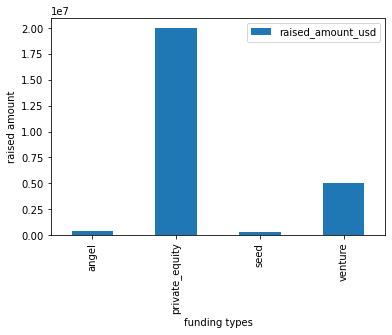

In [61]:
med_funding.plot.bar(ylabel='raised amount', xlabel='funding types')
plt.show()

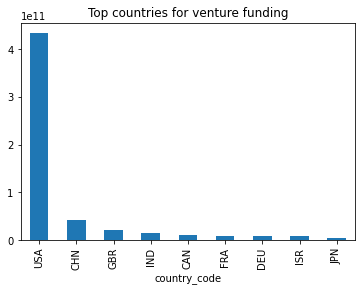

In [62]:
top9.plot.bar(title="Top countries for venture funding")
plt.show()

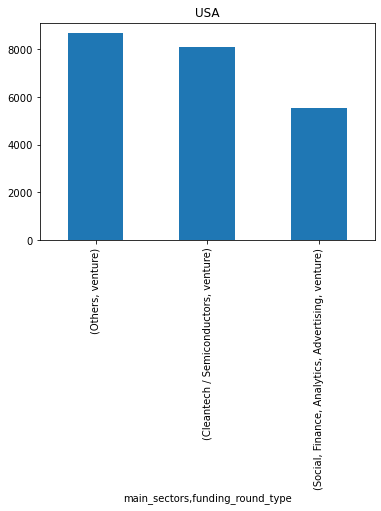

In [63]:
#plotting the three top sectors for investment in these countries
df_USA = merged_frame[merged_frame['funding_round_type'] == 'venture'].groupby(['country_code', 'main_sectors'])['funding_round_type'].value_counts().at['USA'].sort_values(ascending=False)[0: 3]
df_GBR = merged_frame[merged_frame['funding_round_type'] == 'venture'].groupby(['country_code', 'main_sectors'])['funding_round_type'].value_counts().at['GBR'].sort_values(ascending=False)[0: 3]
df_CAN = merged_frame[merged_frame['funding_round_type'] == 'venture'].groupby(['country_code', 'main_sectors'])['funding_round_type'].value_counts().at['CAN'].sort_values(ascending=False)[0: 3]
# fig, axes = plt.subplots(nrows=3, ncols=1)
# df_USA.plot(ax=axes[1,0]).bar()
# axes[1,0].set_title('A')
# df_GBR.plot(ax=axes[2,0]).bar()
# axes[2,0].set_title('B')
# df_IND.plot(ax=axes[3,0]).bar()
# axes[3,0].set_title('C')
df_USA.plot.bar(title='USA')
# df_GBR.plot.bar()
# df_IND.plot.bar()
# plt.plot(df_USA.plot.bar(), df_GBR.plot.bar(), df_IND.plot.bar())
plt.show()

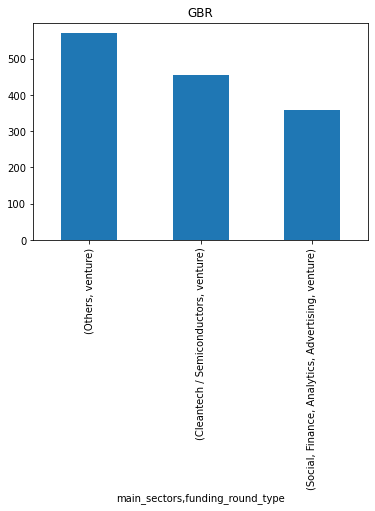

In [64]:
df_GBR.plot.bar(title='GBR')
plt.show()

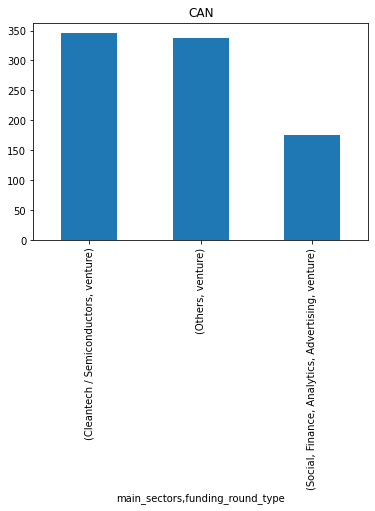

In [65]:
df_CAN.plot.bar(title='CAN')
plt.show()